In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/playground-series-s4e9/sample_submission.csv
/kaggle/input/playground-series-s4e9/train.csv
/kaggle/input/playground-series-s4e9/test.csv


In [2]:
train_df = pd.read_csv('/kaggle/input/playground-series-s4e9/train.csv')
test_df = pd.read_csv('/kaggle/input/playground-series-s4e9/test.csv')


In [3]:
train_df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [4]:
test_df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,188533,Land,Rover LR2 Base,2015,98000,Gasoline,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Beige,None reported,Yes
1,188534,Land,Rover Defender SE,2020,9142,Hybrid,395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,Silver,Black,None reported,Yes
2,188535,Ford,Expedition Limited,2022,28121,Gasoline,3.5L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,White,Ebony,None reported,NaN
3,188536,Audi,A6 2.0T Sport,2016,61258,Gasoline,2.0 Liter TFSI,Automatic,Silician Yellow,Black,None reported,NaN
4,188537,Audi,A6 2.0T Premium Plus,2018,59000,Gasoline,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Gray,Black,None reported,Yes


In [5]:
train_df.describe()

,id,model_year,milage,price
count,188533.000000,188533.000000,188533.000000,1.885330e+05
mean,94266.000000,2015.829998,65705.295174,4.387802e+04
std,54424.933488,5.660967,49798.158076,7.881952e+04
min,0.000000,1974.000000,100.000000,2.000000e+03
25%,47133.000000,2013.000000,24115.000000,1.700000e+04
50%,94266.000000,2017.000000,57785.000000,3.082500e+04
75%,141399.000000,2020.000000,95400.000000,4.990000e+04
max,188532.000000,2024.000000,405000.000000,2.954083e+06


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB


In [7]:
null_stats = train_df.isnull().sum(axis=0)
null_stats[null_stats != 0]

fuel_type       5083
accident        2452
clean_title    21419
dtype: int64

In [8]:
train_df.fillna('missing', inplace=True)
test_df.fillna('missing', inplace=True)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


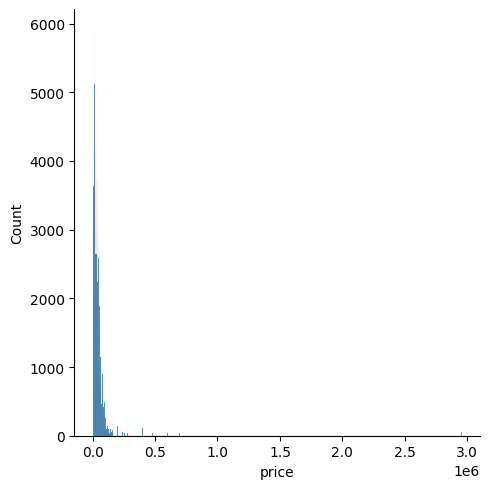

In [9]:
sns.displot(data = train_df,x = 'price' )


<Axes: xlabel='price', ylabel='milage'>

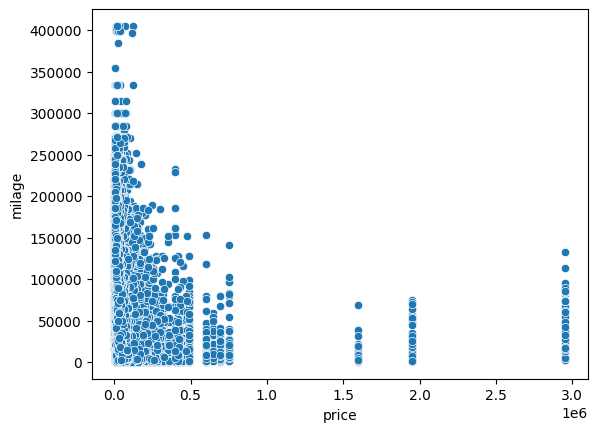

In [10]:
sns.scatterplot(data = train_df, x = 'price', y = 'milage')

In [11]:
#Prepping data
X = train_df.drop(['id','price'], axis = 1)
y = train_df.price

In [12]:

print(X.dtypes)

categorical_features_indices = X.columns[np.where(X.dtypes != float)[0]].values.tolist()
categorical_features_indices

brand           object
model           object
model_year       int64
milage           int64
fuel_type       object
engine          object
transmission    object
ext_col         object
int_col         object
accident        object
clean_title     object
dtype: object


['brand',
 'model',
 'model_year',
 'milage',
 'fuel_type',
 'engine',
 'transmission',
 'ext_col',
 'int_col',
 'accident',
 'clean_title']

In [13]:
#Data Splitting
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X, y, train_size = 0.75, random_state = 42)
X_test = test_df

In [14]:
from catboost import CatBoost, CatBoostRegressor, Pool

In [15]:
model = CatBoostRegressor(custom_metric= ['R2', 'RMSE'], learning_rate=0.1, n_estimators=500)
model.fit( X_train, y_train,
    cat_features=categorical_features_indices,
    eval_set=(X_validation, y_validation),
#     logging_level='Verbose',  # you can uncomment this for text output
    plot=True
);

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 80161.6399203	test: 71027.8216604	best: 71027.8216604 (0)	total: 291ms	remaining: 2m 25s
1:	learn: 79470.7196374	test: 70247.8353876	best: 70247.8353876 (1)	total: 405ms	remaining: 1m 40s
2:	learn: 78905.3339107	test: 69599.7079480	best: 69599.7079480 (2)	total: 597ms	remaining: 1m 38s
3:	learn: 78426.5171019	test: 69034.5661457	best: 69034.5661457 (3)	total: 736ms	remaining: 1m 31s
4:	learn: 78037.0758716	test: 68551.5976366	best: 68551.5976366 (4)	total: 919ms	remaining: 1m 31s
5:	learn: 77691.0583202	test: 68156.6360880	best: 68156.6360880 (5)	total: 1.03s	remaining: 1m 24s
6:	learn: 77398.7245937	test: 67818.0476482	best: 67818.0476482 (6)	total: 1.18s	remaining: 1m 22s
7:	learn: 77168.7402355	test: 67566.1564076	best: 67566.1564076 (7)	total: 1.29s	remaining: 1m 19s
8:	learn: 76958.9104358	test: 67344.4607545	best: 67344.4607545 (8)	total: 1.43s	remaining: 1m 17s
9:	learn: 76764.3677734	test: 67139.3206010	best: 67139.3206010 (9)	total: 1.58s	remaining: 1m 17s
10:	learn:

In [16]:
X_test[categorical_features_indices] = X_test[categorical_features_indices].astype(str)

submisstion = pd.DataFrame()
submisstion['id'] = X_test['id']
submisstion['price'] = model.predict(X_test.drop('id', axis = 1))

In [17]:
submisstion.to_csv(
    'submission_baseline1.csv', index=False
)

#### EDA